# Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. <br>
<br>
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. <br>
<br>
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. <br>
<br>
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. **The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Importing necessary libraries and functions

In [127]:
# Import necessary modules for data analysis and data visualization. 
import pandas as pd
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
## Some other snippit of codes to get the setting right 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [128]:
#creating a function for count of missing values and % of missing values for d1 dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1

In [129]:
#setting the display area
pd.set_option('display.max_columns', 40)

In [130]:
#loading the data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Understanding

In [131]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [132]:
#summary statistics
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [133]:
#shape of data
leads.shape

(9240, 37)

In [134]:
#checking for duplicate records
leads[leads.duplicated()==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


As we can see that we dont have any duplicate record in our data. So moving forward with Data Cleaning

### Data Cleaning

As given in problem statement **Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value**<br>
So selecting columns containing 'Select' and converting it back to null values.

In [135]:
cols = leads.columns
select_cols = []
for col in cols:
    if 'Select' in list(leads[col]):
        select_cols.append(col)
print('Columns containing "Select":',select_cols)

Columns containing "Select": ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [136]:
#converting 'Select' to null values
for col in select_cols:
    leads[col] = leads[col].replace('Select',np.nan)

In [137]:
#checking missing values in data
missing_data(leads).head()

,% of missing value,Count of Missing Values
How did you hear about X Education,78.46,7250
Lead Profile,74.19,6855
Lead Quality,51.59,4767
Asymmetrique Profile Score,45.65,4218
Asymmetrique Activity Score,45.65,4218


In [138]:
#dropping cols with more than 70% null values and Prospect ID column as it will not help us in anyway
leads.drop('How did you hear about X Education', axis=1, inplace=True)
leads.drop('Lead Profile', axis=1, inplace=True)
leads.drop('Prospect ID', axis=1, inplace=True)

In [139]:
#checking the no of unique datapoints in each column
leads.nunique().sort_values()

Get updates on DM Content                           1
Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [140]:
#as we can see first 5 columns in the above list only contains single values, which have zero variance , so dropping all of them
cols_to_drop = ['Get updates on DM Content','Receive More Updates About Our Courses','I agree to pay the amount through cheque',
                'Magazine','Update me on Supply Chain Content']
leads.drop(cols_to_drop, axis=1, inplace=True)

In [141]:
#checking the shape
leads.shape

(9240, 29)

In [142]:
#we can see 9 columns only contains 'Yes' and 'No' values , which can be converted to binary i.e 0 and 1
cols_for_binary = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
                   'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
for col in cols_for_binary:
    leads[col] = leads[col].map({'Yes':1,'No':0})

In [143]:
#checking the missing values
missing_data(leads)

,% of missing value,Count of Missing Values
Lead Quality,51.59,4767
Asymmetrique Profile Score,45.65,4218
Asymmetrique Activity Score,45.65,4218
Asymmetrique Profile Index,45.65,4218
Asymmetrique Activity Index,45.65,4218
City,39.71,3669
Specialization,36.58,3380
Tags,36.29,3353
What matters most to you in choosing a course,29.32,2709
What is your current occupation,29.11,2690


In [144]:
#checking the lead source column
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
WeLearn                 1
testone                 1
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [145]:
#As we can see Google is writte as google , and also Google has the largest no of entries to convering null values to Google
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')

#replacing less than 10 records to Other value
leads['Lead Source'] = leads['Lead Source'].replace('bing','Other')
leads['Lead Source'] = leads['Lead Source'].replace('Click2call','Other')
leads['Lead Source'] = leads['Lead Source'].replace('Press_Release','Other')
leads['Lead Source'] = leads['Lead Source'].replace('Social Media','Other')
leads['Lead Source'] = leads['Lead Source'].replace('Live Chat','Other')
leads['Lead Source'] = leads['Lead Source'].replace('welearnblog_Home','Other')
leads['Lead Source'] = leads['Lead Source'].replace('blog','Other')
leads['Lead Source'] = leads['Lead Source'].replace('Pay per Click Ads','Other')
leads['Lead Source'] = leads['Lead Source'].replace('NC_EDM','Other')
leads['Lead Source'] = leads['Lead Source'].replace('WeLearn','Other')
leads['Lead Source'] = leads['Lead Source'].replace('youtubechannel','Other')
leads['Lead Source'] = leads['Lead Source'].replace('testone','Other')

In [146]:
#checking the last activity and last notable activity column
leads[['Last Activity','Last Notable Activity']].head(10)

,Last Activity,Last Notable Activity
0,Page Visited on Website,Modified
1,Email Opened,Email Opened
2,Email Opened,Email Opened
3,Unreachable,Modified
4,Converted to Lead,Modified
5,Olark Chat Conversation,Modified
6,Email Opened,Modified
7,Olark Chat Conversation,Modified
8,Email Opened,Email Opened
9,Email Opened,Email Opened


As we can see that `Last Activity` column is similar to `Last Notable Activity` Column and data dictionary also says that both means the same thing , so removing `Last Activity` column as it will be redundant and contains some null values

In [147]:
#removing last activity column
leads.drop('Last Activity', axis=1, inplace=True)

In [148]:
#checking the totalvisits and Page views per visit column
leads[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [149]:
#imputing totalvisits and Page views per visit column with their mean values
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan,round(np.mean(leads['TotalVisits'])))
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan,round(np.mean(leads['Page Views Per Visit']),2))

In [150]:
#checking the missing data again
missing_data(leads).head(12)

,% of missing value,Count of Missing Values
Lead Quality,51.59,4767
Asymmetrique Profile Score,45.65,4218
Asymmetrique Activity Score,45.65,4218
Asymmetrique Profile Index,45.65,4218
Asymmetrique Activity Index,45.65,4218
City,39.71,3669
Specialization,36.58,3380
Tags,36.29,3353
What matters most to you in choosing a course,29.32,2709
What is your current occupation,29.11,2690


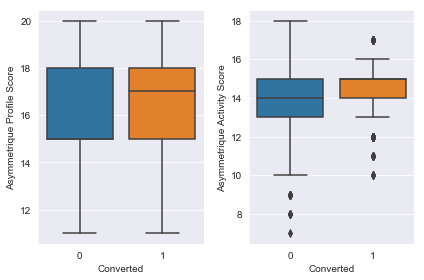

In [151]:
#checking dependence of score on converted variable
plt.subplot(121)
sns.boxplot(y=leads['Asymmetrique Profile Score'],x=leads['Converted'])
plt.subplot(122)
sns.boxplot(y=leads['Asymmetrique Activity Score'],x=leads['Converted'])
plt.tight_layout()
plt.show()

As we can see Asymmetrique Profile Score and Asymmetrique Activity Score does not depend much on converted column and they have a large number of missing values, so we can remove them.

In [152]:
leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score'], axis=1, inplace=True)

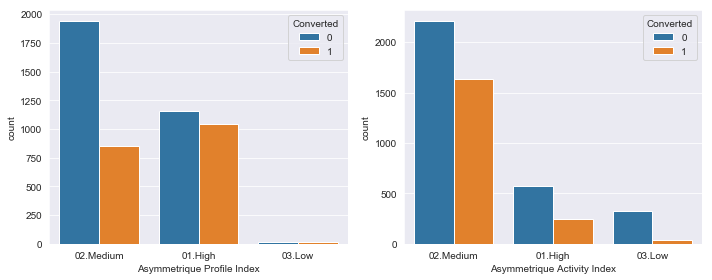

In [153]:
#checking dependence of score on converted variable
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(x=leads['Asymmetrique Profile Index'],hue=leads['Converted'])
plt.subplot(122)
sns.countplot(x=leads['Asymmetrique Activity Index'],hue=leads['Converted'])
plt.tight_layout()
plt.show()

As we can see the above features are not depending much on converted column , also they have high number of missing values , so we can remove them.

In [154]:
leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index'], axis=1, inplace=True)

In [155]:
#checking the Lead Quality Column
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

According to Data Dictionary : **Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.** <br>
Since it is based on the intution of the employee which depends on the mood of employee , and this column also contains bogus values , like `Might be` is same as `Not Sure`, also it is having lot of null values, so dropping this column.

In [156]:
leads.drop('Lead Quality',axis=1, inplace=True)

In [157]:
#checking the missing data again
missing_data(leads).head(8)

,% of missing value,Count of Missing Values
City,39.71,3669
Specialization,36.58,3380
Tags,36.29,3353
What matters most to you in choosing a course,29.32,2709
What is your current occupation,29.11,2690
Country,26.63,2461
Page Views Per Visit,0.00,0
Lead Origin,0.00,0


In [158]:
#checking the city column
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [159]:
#replacing the null values with the Other Cities value
leads['City'] = leads['City'].replace(np.nan,'Other Cities')

In [160]:
#creating a new df for checking data in Specialization column and see converted percentage in each class of this category
aa = pd.DataFrame(leads['Specialization'].value_counts())
aa['Converted'] = leads[leads['Converted'] == 1]['Specialization'].value_counts()
aa['Converted Percentage'] = round(aa['Converted']/aa['Specialization']*100,2)
aa

,Specialization,Converted,Converted Percentage
Finance Management,976,436,44.67
Human Resource Management,848,388,45.75
Marketing Management,838,408,48.69
Operations Management,503,238,47.32
Business Administration,403,179,44.42
IT Projects Management,366,140,38.25
Supply Chain Management,349,151,43.27
"Banking, Investment And Insurance",338,167,49.41
Travel and Tourism,203,72,35.47
Media and Advertising,203,85,41.87


As we can see we have a uniform distribution in Specialization, and this column is also important as converted percentage is high for most of the classes, so replacing null values with ``Other``

In [161]:
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Other')

In [162]:
#checking the missing data again
missing_data(leads).head()

,% of missing value,Count of Missing Values
Tags,36.29,3353
What matters most to you in choosing a course,29.32,2709
What is your current occupation,29.11,2690
Country,26.63,2461
Lead Origin,0.00,0


In [163]:
#checking the tags column
aa = pd.DataFrame(leads['Tags'].value_counts())
aa['Converted'] = leads[leads['Converted'] == 1]['Tags'].value_counts()
aa['Converted Percentage'] = round(aa['Converted']/aa['Tags']*100,2)
aa

,Tags,Converted,Converted Percentage
Will revert after reading the email,2072,2007.0,96.86
Ringing,1203,34.0,2.83
Interested in other courses,513,13.0,2.53
Already a student,465,3.0,0.65
Closed by Horizzon,358,356.0,99.44
switched off,240,4.0,1.67
Busy,186,105.0,56.45
Lost to EINS,175,171.0,97.71
Not doing further education,145,1.0,0.69
Interested in full time MBA,117,3.0,2.56


In [164]:
#since we can see that converted percentage values for Tags variable is not evenly distributed and it is only significant 
#for some classes only, so this column is imbalanced, also it is having lot of null values , so removing this column
leads.drop('Tags',axis=1, inplace=True)

In [165]:
#checking What matters most to you in choosing a course
aa = pd.DataFrame(leads['What matters most to you in choosing a course'].value_counts())
aa['Converted'] = leads[leads['Converted'] == 1]['What matters most to you in choosing a course'].value_counts()
aa['Converted Percentage'] = round(aa['Converted']/aa['What matters most to you in choosing a course']*100,2)
aa['Total Percentage'] = round(aa['What matters most to you in choosing a course']/len(leads)*100,2)
aa

,What matters most to you in choosing a course,Converted,Converted Percentage,Total Percentage
Better Career Prospects,6528,3190.0,48.87,70.65
Flexibility & Convenience,2,1.0,50.00,0.02
Other,1,NaN,NaN,0.01


As we can see from the above data, `What matters most to you in choosing a course` column contains 70% `Better Prospect value` and about 30% null values, data will be highly imbalanced in this case, so deleting this variable 

In [166]:
#dropping the variable
leads.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [167]:
#checking the missing data again
missing_data(leads).head()

,% of missing value,Count of Missing Values
What is your current occupation,29.11,2690
Country,26.63,2461
Last Notable Activity,0.00,0
Lead Origin,0.00,0
Lead Source,0.00,0


In [168]:
#checking the "What is your current occupation"
aa = pd.DataFrame(leads['What is your current occupation'].value_counts())
aa['Converted'] = leads[leads['Converted'] == 1]['What is your current occupation'].value_counts()
aa['Converted Percentage'] = round(aa['Converted']/aa['What is your current occupation']*100,2)
aa['Total Percentage'] = round(aa['What is your current occupation']/len(leads)*100,2)
aa

,What is your current occupation,Converted,Converted Percentage,Total Percentage
Unemployed,5600,2441,43.59,60.61
Working Professional,706,647,91.64,7.64
Student,210,78,37.14,2.27
Other,16,10,62.50,0.17
Housewife,10,10,100.00,0.11
Businessman,8,5,62.50,0.09


In [169]:
#imputing the null values with other in this column
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Other')

In [170]:
#checking the country column
aa = pd.DataFrame(leads['Country'].value_counts())
aa['Converted'] = leads[leads['Converted'] == 1]['Country'].value_counts()
aa['Converted Percentage'] = round(aa['Converted']/aa['Country']*100,2)
aa['Total Percentage'] = round(aa['Country']/len(leads)*100,2)
aa

,Country,Converted,Converted Percentage,Total Percentage
India,6492,2401.0,36.98,70.26
United States,69,18.0,26.09,0.75
United Arab Emirates,53,20.0,37.74,0.57
Singapore,24,11.0,45.83,0.26
Saudi Arabia,21,4.0,19.05,0.23
United Kingdom,15,5.0,33.33,0.16
Australia,13,3.0,23.08,0.14
Qatar,10,1.0,10.00,0.11
Bahrain,7,4.0,57.14,0.08
Hong Kong,7,4.0,57.14,0.08


As we can see from the above data, `Country` column contains 70% `India` value and about 26% null values, data will be highly imbalanced in this case for value India, so deleting this variable.

In [171]:
#dropping the Country column
leads.drop('Country',axis=1, inplace=True)

In [172]:
#checking the missing data
missing_data(leads).head()

,% of missing value,Count of Missing Values
Last Notable Activity,0.0,0
A free copy of Mastering The Interview,0.0,0
Lead Origin,0.0,0
Lead Source,0.0,0
Do Not Email,0.0,0


Now we can see the we dont have any missing value , so we can proceed with EDA

In [173]:
#checking the shape
leads.shape

(9240, 20)

### Outlier Analysis

In [174]:
#Outlier analysis for numerical columns
cols = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
leads[cols].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9240.000000,9240.000000,9240.000000
mean,3.438636,2.362778,487.698268
std,4.819024,2.145333,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
90%,7.000000,5.000000,1380.000000
95%,10.000000,6.000000,1562.000000
99%,17.000000,9.000000,1840.610000


As we can see, we have an outlier according to `TotalVisits` and `Page Views Per visit` column

In [175]:
#checking TotalVisits column
leads[leads['TotalVisits'] > 50]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
2190,638668,Landing Page Submission,Direct Traffic,1,0,0,55.0,297,55.00,IT Projects Management,Unemployed,0,0,0,0,0,0,Other Cities,1,Modified
2322,637257,Landing Page Submission,Direct Traffic,1,0,0,141.0,755,6.71,Human Resource Management,Other,0,0,0,0,0,0,Mumbai,1,Page Visited on Website
5283,609249,Landing Page Submission,Direct Traffic,1,0,0,74.0,1209,12.33,Other,Unemployed,0,0,0,0,0,0,Thane & Outskirts,0,Page Visited on Website
5538,607470,Landing Page Submission,Referral Sites,0,0,0,54.0,1280,4.50,Other,Other,0,0,0,0,0,0,Mumbai,0,SMS Sent
5608,606961,Landing Page Submission,Referral Sites,1,0,0,115.0,187,8.21,Rural and Agribusiness,Unemployed,0,0,0,0,0,0,Mumbai,0,Page Visited on Website
6102,602958,Landing Page Submission,Direct Traffic,0,0,1,251.0,49,1.48,Supply Chain Management,Unemployed,0,0,0,0,0,0,Mumbai,1,Page Visited on Website


In [176]:
#removing these 6 records will not affect our model much
leads = leads[leads['TotalVisits'] <= 50]

In [177]:
#checking shape
leads.shape

(9234, 20)

In [178]:
#checking outlier again
leads[cols].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9234.000000,9234.000000,9234.000000
mean,3.366147,2.354759,487.606130
std,3.477567,2.070798,548.047472
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
90%,7.000000,5.000000,1380.000000
95%,9.000000,6.000000,1562.000000
99%,16.670000,9.000000,1840.670000


Now we have a continuous distribution among numerical variables , we are good to go with other EDA

### EDA

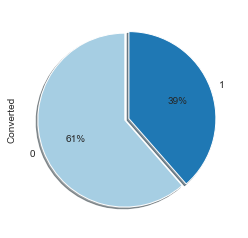

In [179]:
#checking the converted column and finding if data is having any imbalance
leads['Converted'].value_counts().plot.pie(autopct='%1.0f%%',explode=[0.05,0], startangle=90, shadow = True, 
                                                 colors = sns.color_palette('Paired'))

As we can see we have a ratio of `39/61` we can say that our data is slightly imbalanced.

In [180]:
#checking the unique values
leads.nunique().sort_values()

Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Through Recommendations                      2
Digital Advertisement                        2
A free copy of Mastering The Interview       2
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Lead Origin                                  5
City                                         6
What is your current occupation              6
Lead Source                                  9
Last Notable Activity                       16
Specialization                              19
TotalVisits                                 35
Page Views Per Visit                       110
Total Time Spent on Website               1731
Lead Number                               9234
dtype: int64

In [181]:
#Analysing the variables having 2 unique values only 
cols = ['Do Not Email','Do Not Call','Through Recommendations','Digital Advertisement','Newspaper',
        'A free copy of Mastering The Interview','Search','Newspaper Article','X Education Forums']

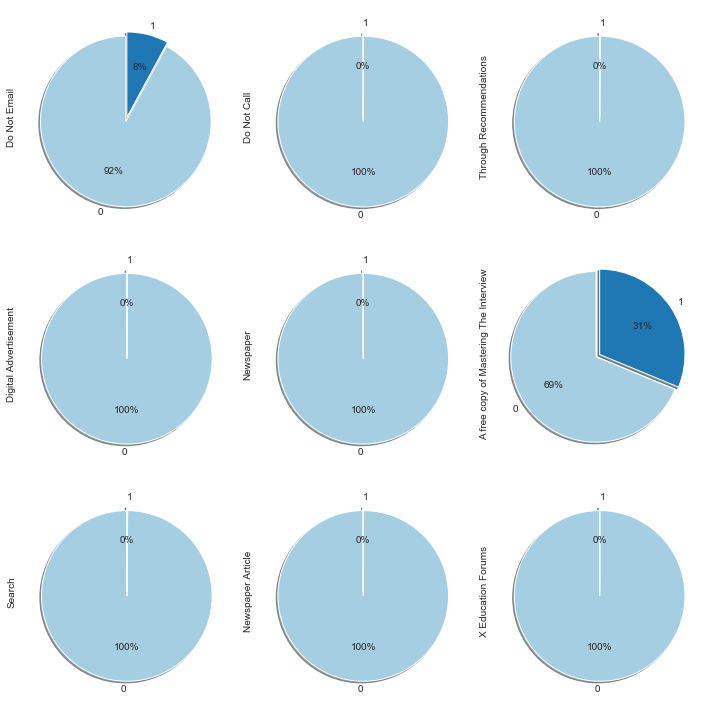

In [182]:
i = 1
plt.figure(figsize=(10,10))
  
for col in cols:
    plt.subplot(3,3,i)
    leads[col].value_counts().plot.pie(autopct='%1.0f%%',explode=[0.05,0], startangle=90, shadow = True, 
                                                 colors = sns.color_palette('Paired'))
    i=i+1                 
plt.tight_layout()    
plt.show()   

Most of the columns are highly imbalanced , so removing them all to remove biasness from out model

In [183]:
#cols to remove
cols = ['Through Recommendations','Digital Advertisement','Newspaper','Search','Newspaper Article','X Education Forums',
       'Do Not Call']
#removing the columns
leads.drop(cols, axis=1, inplace=True)

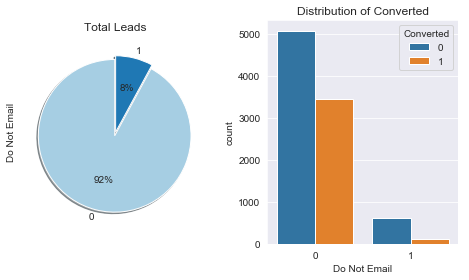

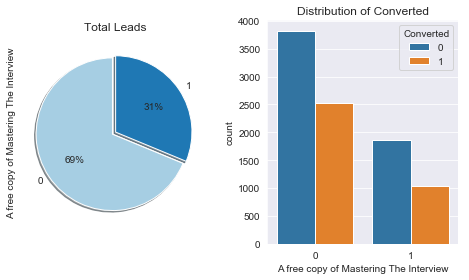

In [184]:
#bivariate analysis
cols = ['Do Not Email', 'A free copy of Mastering The Interview']
  
for col in cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1)
    leads[col].value_counts().plot.pie(autopct='%1.0f%%',explode=[0.05,0], startangle=90, shadow = True, 
                                                 colors = sns.color_palette('Paired'))
    plt.title('Total Leads')
    plt.subplot(1,3,2)
    sns.countplot(leads[col],hue=leads['Converted'])
    plt.title('Distribution of Converted')
    plt.tight_layout()    
    plt.show()  

We can see , uniform distribution among above 2 variables, the who choose to contacted by email are the most who get converted.

Count of Leads which have been put under `Might be` category are the ones which gets converted most and the leads which were put in `Worst` category didnt get converted.

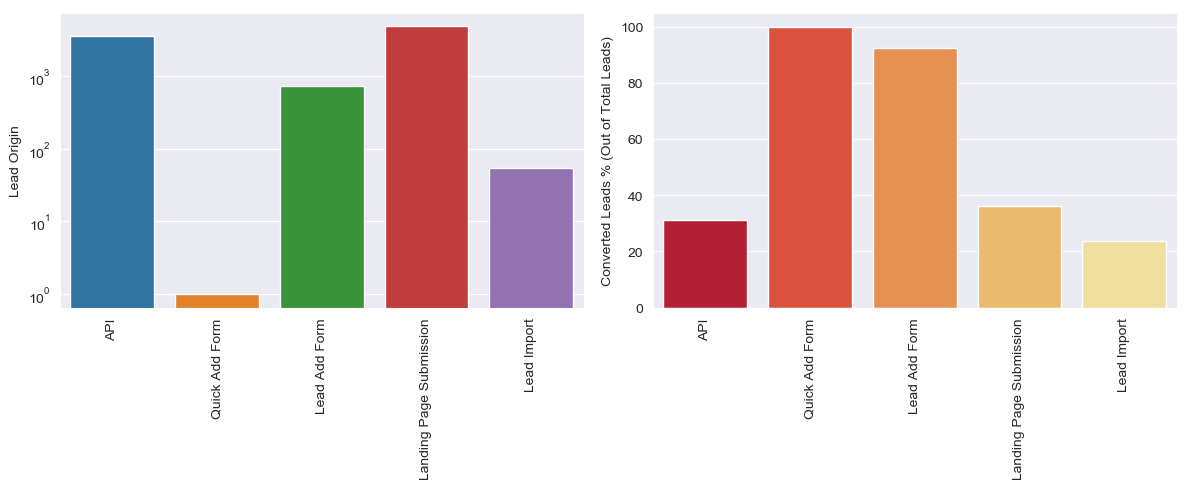

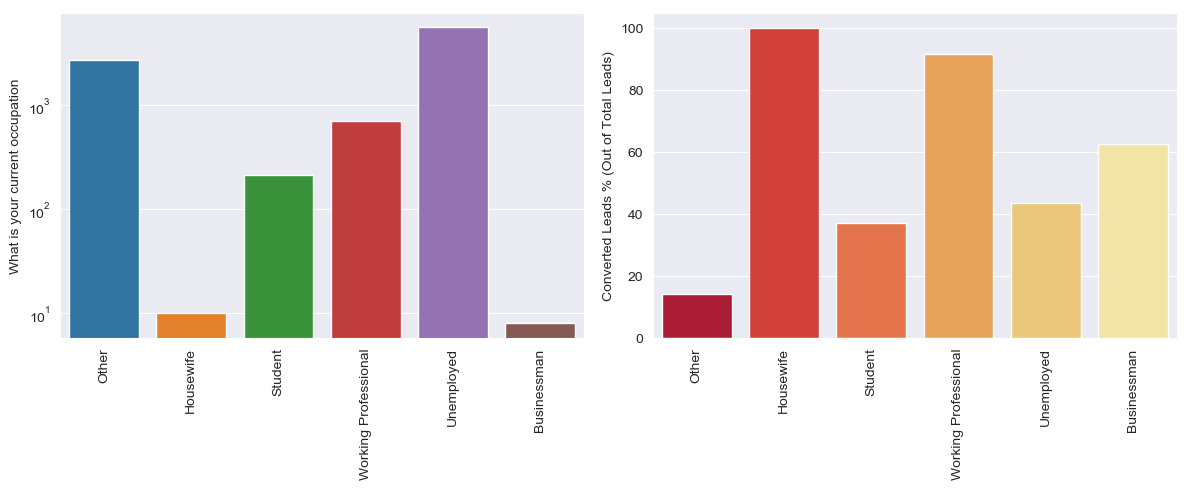

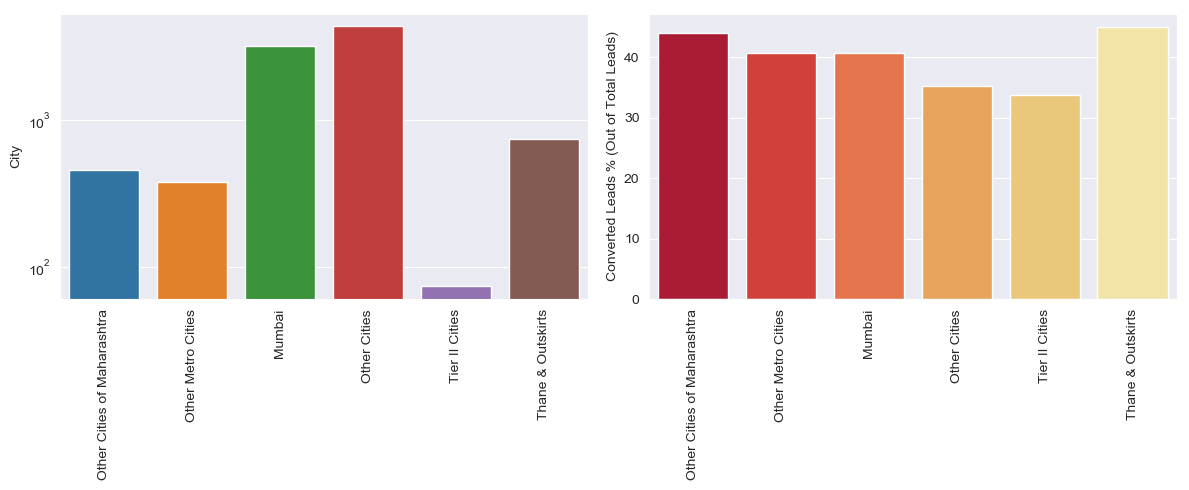

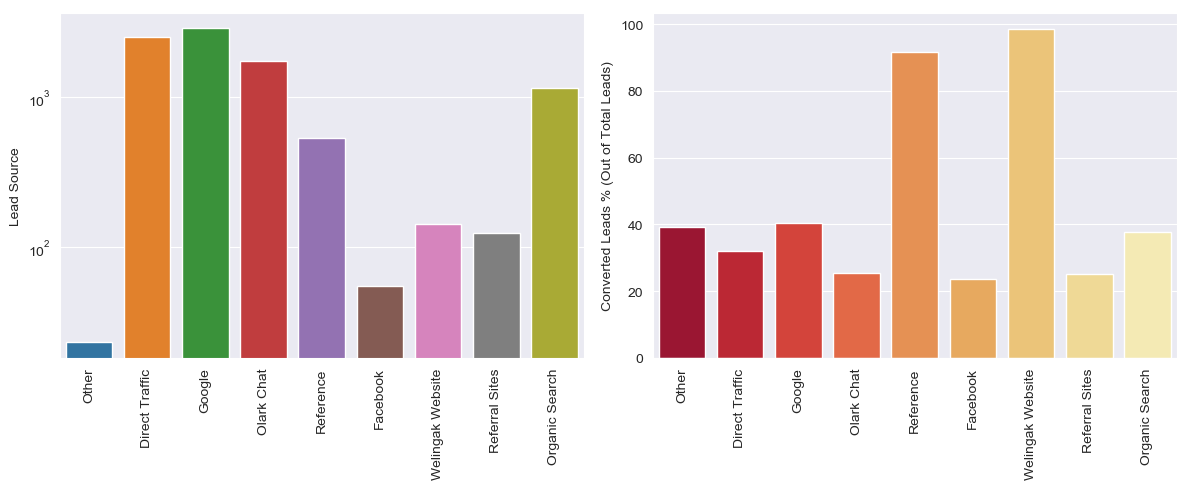

In [185]:
cols = ['Lead Origin','What is your current occupation','City','Lead Source']
for col in cols:
    plt.figure(figsize=(12,5), dpi=100)
    aa = pd.DataFrame(leads[col].value_counts(sort=False))
    aa['Converted Leads'] = leads[leads['Converted']==1][col].value_counts(sort=False)
    aa['percentage'] = round(aa['Converted Leads']/aa[col]*100,3)
    plt.subplot(121)
    sns.barplot(y=aa[col],x=aa.index)
    plt.xticks(rotation=90)
    plt.yscale('log')
    plt.subplot(122)
    sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
    plt.ylabel('Converted Leads % (Out of Total Leads)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Important Points from above visualizations:
- Count of leads with Lead Origin : Landing Page Submission, Lead Add Form and API is most and Lead Add Form are the ones who get converted most.
- Unemployed Persons are the most who landed on website and percentage of Working Professionals who gets converted is very high. It seems that working professionals are finding better prospects in their career.
- Leads from Mumbai and Other cities are highest and they also gets converted at a good rate.
- Percentage of leads with lead source as reference get converted. That means reference is important and X has to increase networking and give some perks to the current students to that they give more reference to their courses to their friends.

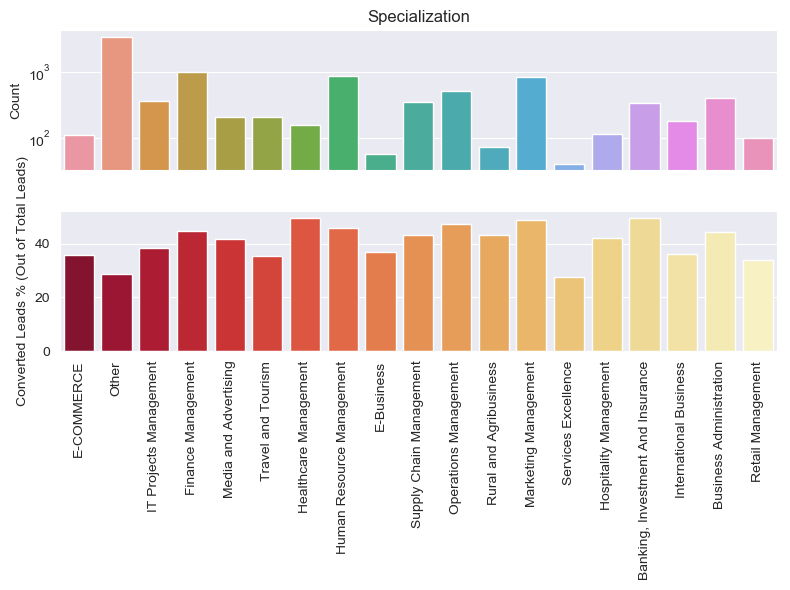

In [186]:
#checiking the specialization column
plt.figure(figsize=(8,6),dpi=100)
aa = pd.DataFrame(leads['Specialization'].value_counts(sort=False))
aa['Converted Leads'] = leads[leads['Converted']==1]['Specialization'].value_counts(sort=False)
aa['percentage'] = round(aa['Converted Leads']/aa['Specialization']*100,3)
plt.subplot(211)
sns.barplot(y=aa['Specialization'],x=aa.index)
plt.xticks([])
plt.title('Specialization')
plt.ylabel('Count')
plt.yscale('log')
plt.subplot(212)
sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
plt.ylabel('Converted Leads % (Out of Total Leads)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Important points regarding to Specialization:
- Leads from Finance, Marketing and Human Resource Management are more in number and they also get converted at the highest rate.

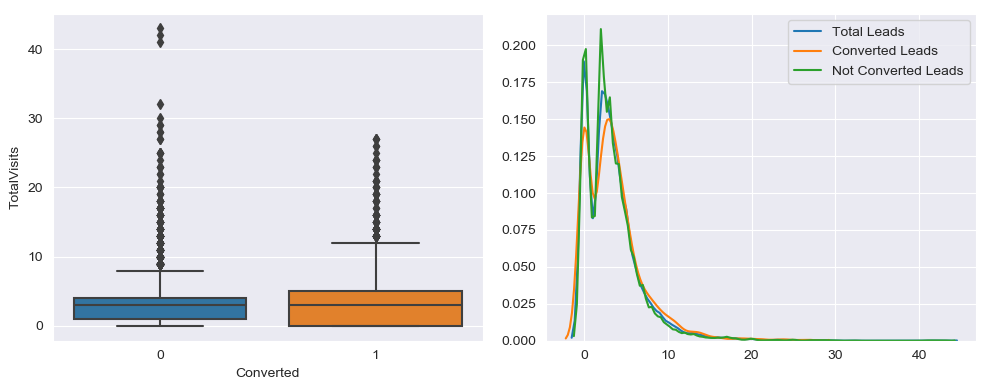

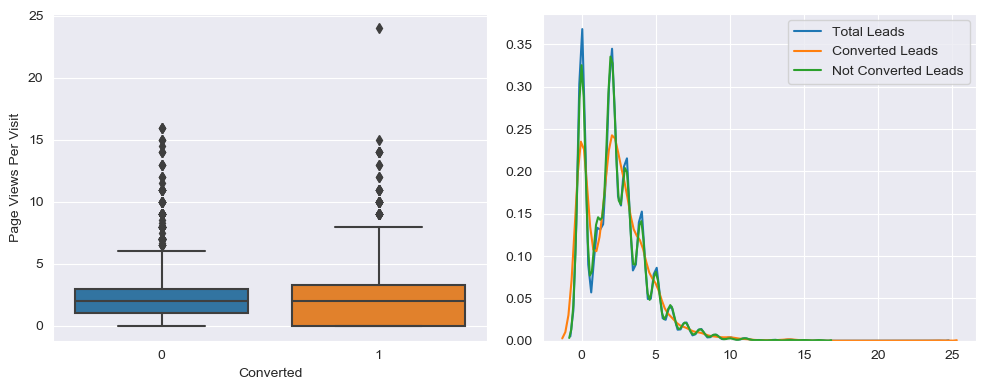

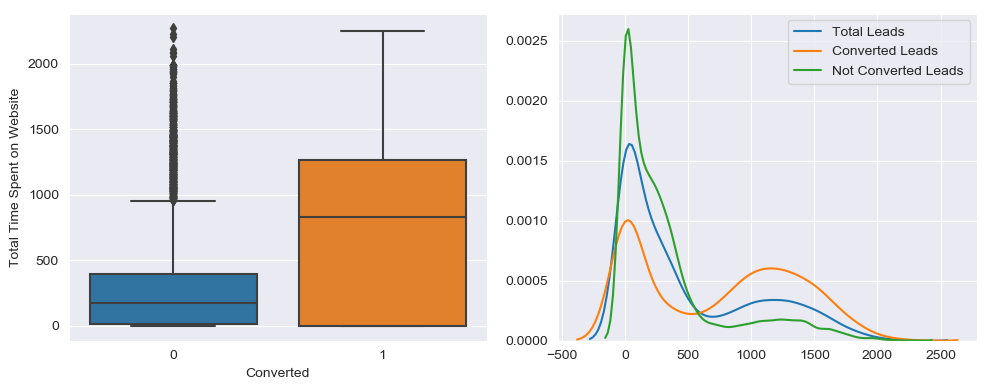

In [187]:
#checking the numerical columns
cols = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']
for col in cols:    
    plt.figure(figsize=(10,4), dpi=100)
    plt.subplot(1,2,1)
    sns.boxplot(y =leads[col],x=leads['Converted'])
                                                       
    plt.subplot(1,2,2)
    sns.kdeplot(leads[col], label='Total Leads')
    sns.kdeplot(leads[leads['Converted'] == 1][col],label='Converted Leads')
    sns.kdeplot(leads[leads['Converted'] == 0][col],label='Not Converted Leads')
    plt.tight_layout()
    plt.show()

Points to note:
- Average Number of Total Visits is around 5 for all type of leads.
- Converted Leads spent more time on website.
- Around 2-3 Page views per visit for all type of leads.


In [188]:
#checking the last notable activity column
leads['Last Notable Activity'].value_counts()

Modified                        3406
Email Opened                    2827
SMS Sent                        2171
Page Visited on Website          314
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

As we can see we have values with less than 10 , converting them to Modified to in order to ensure good model

In [189]:
values = ['Email Marked Spam','Form Submitted on Website','Email Received','View in browser link Clicked','Approached upfront',
         'Resubscribed to emails']
for value in values:
    leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(value,'Modified')

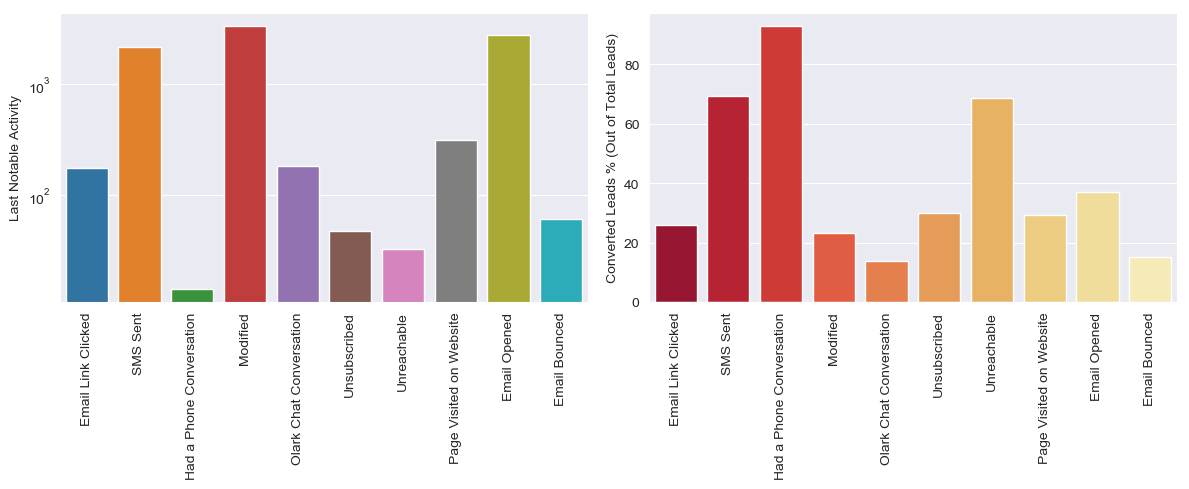

In [190]:
#checking the 'Last Notable Activity' 'Last Notable Activity'umn
plt.figure(figsize=(12,5), dpi=100)
aa = pd.DataFrame(leads['Last Notable Activity'].value_counts(sort=False))
aa['Converted Leads'] = leads[leads['Converted']==1]['Last Notable Activity'].value_counts(sort=False)
aa['percentage'] = round(aa['Converted Leads']/aa['Last Notable Activity']*100,3)
plt.subplot(121)
sns.barplot(y=aa['Last Notable Activity'],x=aa.index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(122)
sns.barplot(y=aa['percentage'], x=aa.index, palette='YlOrRd_r')
plt.ylabel('Converted Leads % (Out of Total Leads)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Important Pointers :
- Out of the total leads to which SMS has been sent, around 70% gets converted.
- Leads with which we had a phone conversation gets converted at around 90 percent rate. So X company should call their leads so that they can be converted.

### Dummy Variables Creation

In [191]:
#finding categorical variables
cat_var = leads.dtypes[leads.dtypes == 'object'].index
cat_var

Index(['Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

In [192]:
#doing one hot code encoding on categorical variables
lead1 = pd.get_dummies(leads[cat_var],drop_first=True)
lead1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [193]:
#concatinating the encoded and numerical dataframe to get the model ready dataset
num_features = leads.dtypes[leads.dtypes != 'object'].index
num_features

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [194]:
leads = pd.concat([leads[num_features],lead1], axis=1)
leads.shape

(9234, 56)

In [195]:
#checking the head
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [196]:
#setting the Lead Number as index of the DF as it will help in model building
leads.set_index('Lead Number', inplace=True)

### Train-Test split

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
# Putting feature variable to X
X = leads.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
660727,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
660681,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [199]:
y = leads['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [200]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
#cols to scale
cols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
592648,0,-0.390598,2.028801,-0.168977,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
649186,0,0.768196,1.620434,1.770958,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
599610,0,-0.969995,-0.889931,-1.138944,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
593559,0,0.188799,-0.700332,-0.168977,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
629447,0,-0.969995,-0.889931,-1.138944,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [203]:
#transforming the test data
X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
613330,0,0.478498,1.904832,0.073515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
640752,0,-0.969995,-0.889931,-1.138944,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
606790,0,-0.969995,-0.889931,-1.138944,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
583629,0,-0.390598,-0.848000,-0.168977,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
649244,0,0.188799,0.836514,-0.168977,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


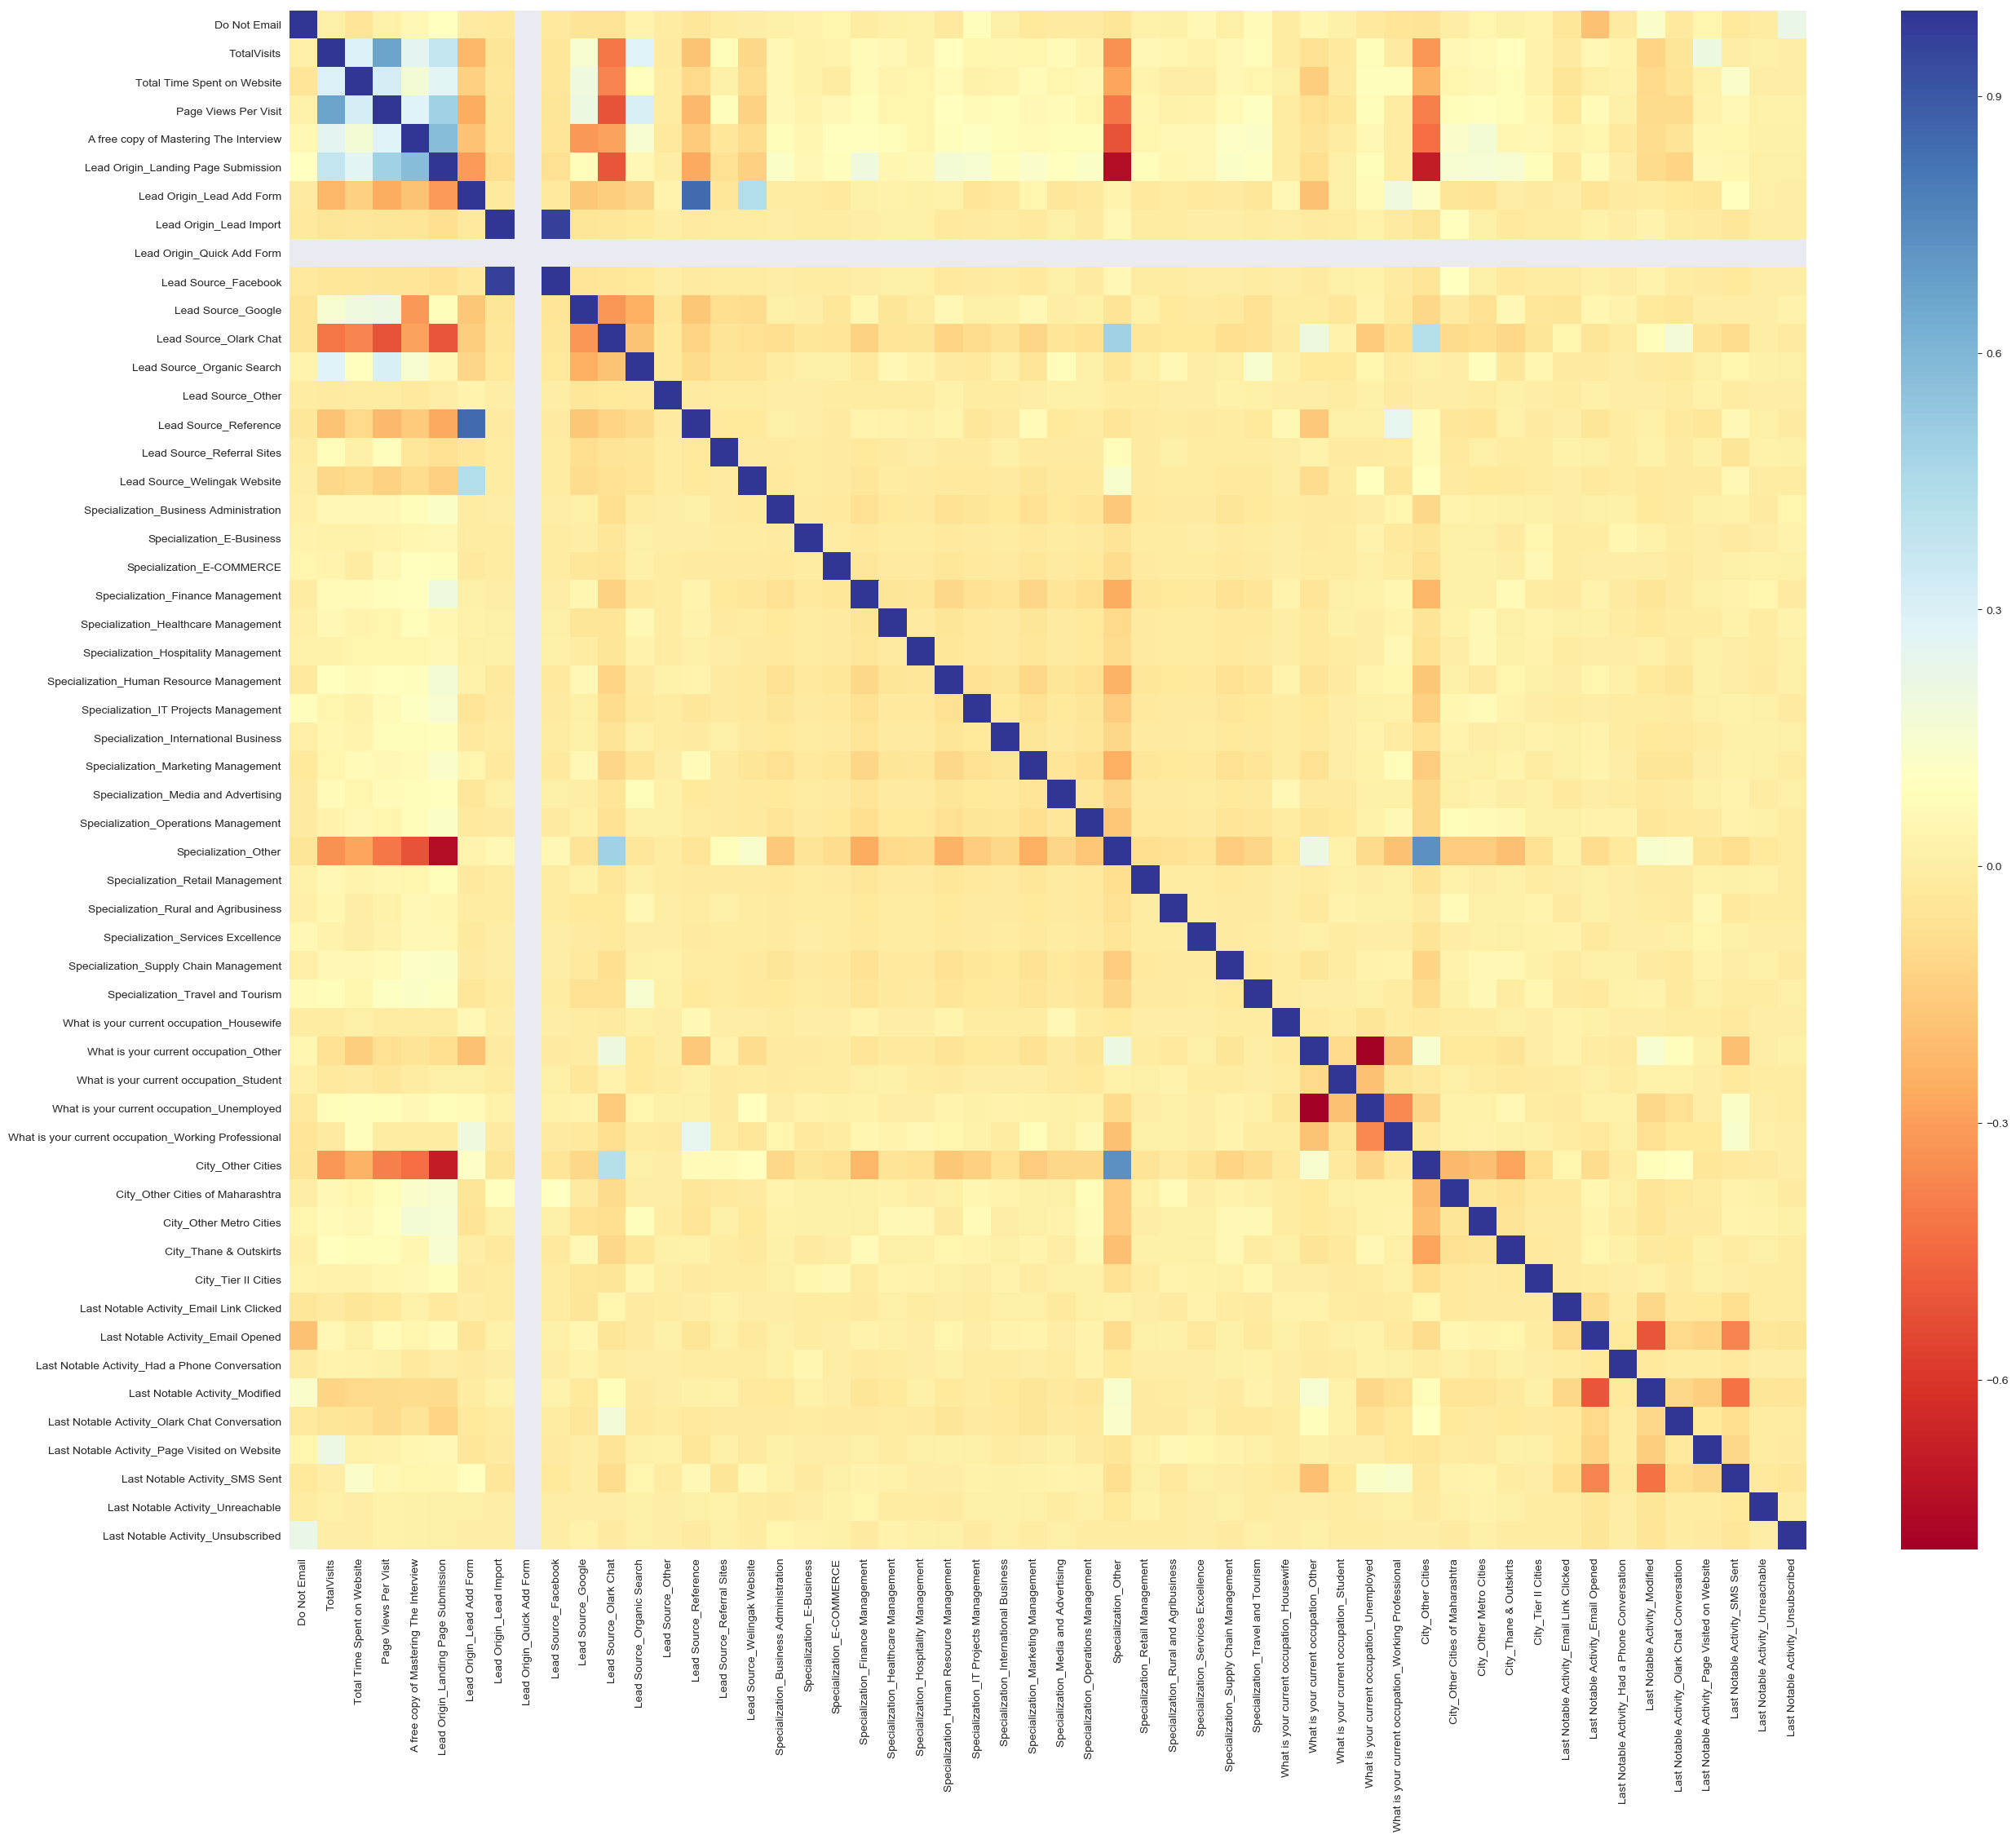

In [204]:
#checking correlation of train dataframe 
plt.figure(figsize=(30,25),dpi=100)
sns.heatmap(X_train.corr(), cmap='RdYlBu')
plt.show()

As we can see we have some blue and red dots indicating high correlation of variables , lets use power of VIF and remove those variables from our data and remove the issue of Multicollinearity

In [205]:
# creating function for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [206]:
vif(X_train).head()

,Features,VIF
38,What is your current occupation_Unemployed,107.27
36,What is your current occupation_Other,52.42
48,Last Notable Activity_Modified,49.69
46,Last Notable Activity_Email Opened,42.72
51,Last Notable Activity_SMS Sent,33.03


In [207]:
#removing What is your current occupation_Unemployed and checking VIF again
X_train.drop('What is your current occupation_Unemployed',axis=1, inplace=True)
vif(X_train).head()

,Features,VIF
6,Lead Origin_Lead Add Form,18.01
9,Lead Source_Facebook,16.93
7,Lead Origin_Lead Import,16.89
47,Last Notable Activity_Modified,15.07
14,Lead Source_Reference,14.57


As we can see we have dropped VIF values significantly by just dropping one variable, Lets start model building

### Model Building

In [208]:
#importing libraries
import statsmodels.api as sm

#### First Model

In [209]:
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
print(logm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6410
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        02:26:57   Pearson chi2:                 9.53e+18
No. Iterations:                   100   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

#### Using RFE

Using RFE and selecting 15 features from the dataframe

In [210]:
#importing necessary libraries and selecting features
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)
rfe.fit(X_train,y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 39),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Other', False, 11),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 26),
 ('Specialization_E-COMMERCE', False, 12),
 ('Specialization_Finance Management', False, 37),
 ('Specialization_Healthcare Management', False, 31),
 ('Specialization_Hospitality Management', False, 2),
 ('Specializ

In [211]:
cols_rfe = X_train.columns[rfe.support_]
print('Features with RFE support:')
print(cols_rfe)
print('*'*100)
print('Features without RFE support:')
cols_not_rfe = X_train.columns[~rfe.support_]
print(cols_not_rfe)

Features with RFE support:
Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Specialization_Other', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')
****************************************************************************************************
Features without RFE support:
Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source

In [212]:
#taking cols with RFE support
X_train = X_train[cols_rfe]

#### Iterative Models

In [213]:
#creating the model with RFE features
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
print(logm.summary())
print(vif(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.8
Date:                Mon, 26 Aug 2019   Deviance:                       5279.6
Time:                        02:26:59   Pearson chi2:                 6.87e+03
No. Iterations:                    21   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

In [214]:
#creating the model with RFE features
X_train.drop('What is your current occupation_Housewife',axis=1, inplace=True)
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
print(logm.summary())
print(vif(X_train))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.5
Date:                Mon, 26 Aug 2019   Deviance:                       5288.9
Time:                        02:26:59   Pearson chi2:                 6.89e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                          

As we can see , all the `p-values` are less than `0.05` and `VIF` is also less than `5` for all the variables , so we can say that our model is statistically perfect.

In [215]:
#creating y_train_pred_final df
y_train_pred = logm.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted_Actual':y_train.values,'Convert_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
#selecting 0.5 as cutoff value
y_train_pred_final['Predicted'] = y_train_pred_final['Convert_Prob'].map(lambda x : 1 if x > 0.5 else 0)
print('y_train_pred_final:')
print(y_train_pred_final.head())
print('='*100)

#printing confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
confusion = confusion_matrix(y_train_pred_final.Converted_Actual,y_train_pred_final.Predicted)
print(confusion)
print('='*100)
# Let's check the overall accuracy.
from sklearn.metrics import accuracy_score
print('Accuracy Score:')
print(accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.Predicted))

y_train_pred_final:
   Converted_Actual  Convert_Prob  Lead Number  Predicted
0                 0      0.925464       592648          1
1                 1      0.888118       649186          1
2                 1      0.996596       599610          1
3                 0      0.241924       593559          0
4                 1      0.830822       629447          1
Confusion Matrix:
[[3519  459]
 [ 741 1744]]
Accuracy Score:
0.8143277115890454


Points from confusion matrix and accuracy score:
- Very good accuracy score of `0.8143`
- `741` leads are predicted as Not Good leads by model, which is loss to company , we will find different cutoff to make this number as low as possible.
- `459` leads as predicted as Hot Leads but in actual they are not Converted Leads, so calling these leads is not a actual loss , or it may happen that they are getting converted while getting call from X education.

In [216]:
#caculating the important metrics
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]
TP = confusion[1,1]

print('True Positive Rate(TPR) or Sensitivity or Recall =',TP/float(TP+FN))
print('True Negative Rate(TNR) or Specificity =',TN/float(TN+FP))
print('False Positive Rate(FPR)or(1-Specificity) =',FP/float(TN+FP))
print('Positive Predictive Value or Precision =',TP/float(TP+FP))
print('Negative Predictive Value =',TN/float(TN+FN))

True Positive Rate(TPR) or Sensitivity or Recall = 0.7018108651911469
True Negative Rate(TNR) or Specificity = 0.8846153846153846
False Positive Rate(FPR)or(1-Specificity) = 0.11538461538461539
Positive Predictive Value or Precision = 0.7916477530640036
Negative Predictive Value = 0.826056338028169


#### ROC Curve

 ROC Curves which show the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR). And as was established from the formulas above, TPR and FPR are nothing but sensitivity and (1 - specificity), so it can also be looked at as a tradeoff between sensitivity and specificity. 

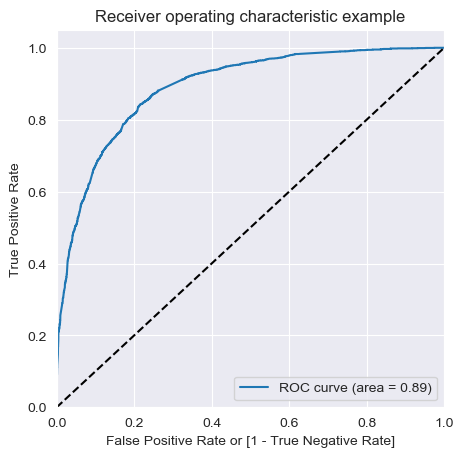

In [217]:
#ROC curve
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5),dpi=100)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted_Actual, y_train_pred_final.Convert_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted_Actual, y_train_pred_final.Convert_Prob)

**Area Under the Curve**

By determining the Area under the curve (AUC) of a ROC curve, you can determine how good the model is. If the ROC curve is more towards the upper-left corner of the graph, it means that the model is very good and if it is more towards the 45-degree diagonal, it means that the model is almost completely random. So, the larger the AUC, the better will be your model which is something you saw in the last segment as well. <br>
So in our model we are getting very good ROC curve area with 0.5 cutoff.

### Choosing cutoff value

In [218]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Actual,Convert_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.925464,592648,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888118,649186,1,1,1,1,1,1,1,1,1,1,0
2,1,0.996596,599610,1,1,1,1,1,1,1,1,1,1,1
3,0,0.241924,593559,0,1,1,1,0,0,0,0,0,0,0
4,1,0.830822,629447,1,1,1,1,1,1,1,1,1,1,0


In [219]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_Actual, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384496  1.000000  0.000000
0.1   0.1  0.623395  0.977867  0.401961
0.2   0.2  0.760328  0.919920  0.660633
0.3   0.3  0.804116  0.846278  0.777778
0.4   0.4  0.812471  0.785915  0.829060
0.5   0.5  0.814328  0.701811  0.884615
0.6   0.6  0.800248  0.606036  0.921569
0.7   0.7  0.782609  0.520724  0.946204
0.8   0.8  0.763113  0.437425  0.966566
0.9   0.9  0.716540  0.284909  0.986174


<Figure size 600x400 with 0 Axes>

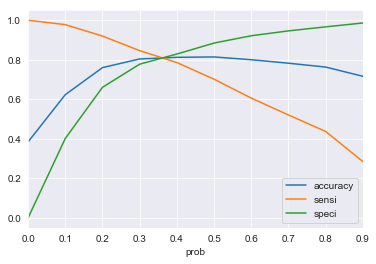

In [220]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(dpi=100)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [221]:
#as we can see tradeoff at 0.36 so selecting 0.36 as cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted_Actual,Convert_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.925464,592648,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888118,649186,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.996596,599610,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.241924,593559,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.830822,629447,1,1,1,1,1,1,1,1,1,1,0,1


In [222]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
confusion = confusion_matrix(y_train_pred_final.Converted_Actual,y_train_pred_final.final_predicted)
print(confusion)
print('='*100)
# Let's check the overall accuracy.
from sklearn.metrics import accuracy_score
print('Accuracy Score:')
print(accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.final_predicted))

Confusion Matrix:
[[3215  763]
 [ 474 2011]]
Accuracy Score:
0.8086028160297075


Comparison of Cutoff **0.36 v/s 0.5**:
- accuracy score decreased to `0.8143` from `0.8086` which is very minimal and not impacting our model much.
- `459` leads as predicted as Hot Leads when `0.5` was cutoff, now it is increased to `763`, though the value is increasing but in actual they are not Converted Leads, so calling these leads is not a actual loss , or it may happen that they are getting converted while getting call from X education.

In [223]:
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]
TP = confusion[1,1]

print('True Positive Rate(TPR) or Sensitivity or Recall =',TP/float(TP+FN))
print('True Negative Rate(TNR) or Specificity =',TN/float(TN+FP))
print('False Positive Rate(FPR)or(1-Specificity) =',FP/float(TN+FP))
print('Positive Predictive Value or Precision =',TP/float(TP+FP))
print('Negative Predictive Value =',TN/float(TN+FN))

True Positive Rate(TPR) or Sensitivity or Recall = 0.8092555331991952
True Negative Rate(TNR) or Specificity = 0.8081950729009553
False Positive Rate(FPR)or(1-Specificity) = 0.19180492709904476
Positive Predictive Value or Precision = 0.7249459264599856
Negative Predictive Value = 0.8715098942802928


Points:
- Sensitivity increased from `0.7018` to `0.8092`.

#### Precision and recall tradeoff

In [224]:
#importing the library
from sklearn.metrics import precision_recall_curve

In [225]:
#activating precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_Actual, y_train_pred_final.Convert_Prob)

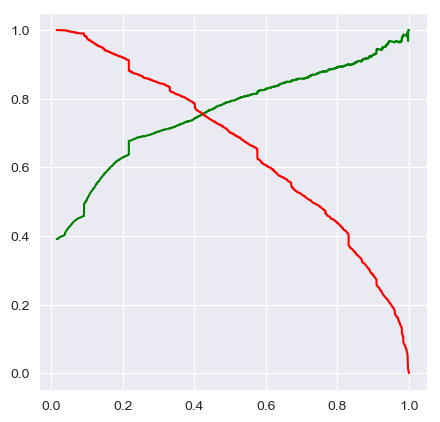

In [226]:
#plotting the curve
plt.figure(figsize=(5,5),dpi=100)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [227]:
#as we can see tradeoff at 0.42 so selecting 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted_Actual,Convert_Prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_2
0,0,0.925464,592648,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.888118,649186,1,1,1,1,1,1,1,1,1,1,0,1,1
2,1,0.996596,599610,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.241924,593559,0,1,1,1,0,0,0,0,0,0,0,0,0
4,1,0.830822,629447,1,1,1,1,1,1,1,1,1,1,0,1,1


In [228]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
confusion = confusion_matrix(y_train_pred_final.Converted_Actual,y_train_pred_final.final_predicted_2)
print(confusion)
print('='*100)
# Let's check the overall accuracy.
from sklearn.metrics import accuracy_score
print('Accuracy Score:')
print(accuracy_score(y_train_pred_final.Converted_Actual, y_train_pred_final.final_predicted_2))

Confusion Matrix:
[[3360  618]
 [ 601 1884]]
Accuracy Score:
0.8113879003558719


In [229]:
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]
TP = confusion[1,1]

print('True Positive Rate(TPR) or Sensitivity or Recall =',TP/float(TP+FN))
print('True Negative Rate(TNR) or Specificity =',TN/float(TN+FP))
print('False Positive Rate(FPR)or(1-Specificity) =',FP/float(TN+FP))
print('Positive Predictive Value or Precision =',TP/float(TP+FP))
print('Negative Predictive Value =',TN/float(TN+FN))

True Positive Rate(TPR) or Sensitivity or Recall = 0.758148893360161
True Negative Rate(TNR) or Specificity = 0.8446455505279035
False Positive Rate(FPR)or(1-Specificity) = 0.15535444947209653
Positive Predictive Value or Precision = 0.7529976019184652
Negative Predictive Value = 0.848270638727594


#### Comparison of different Cut-Offs 

                    0.5 Cutoff      0.36 Cutoff      0.42 Cutoff       
    - Accuracy        0.8143          0.8086           0.8113                  
    - Sensitivity     0.7018          0.8092           0.7581  
    - Specificity     0.8846          0.8081           0.8446

From the above metrics comparison , we can see that cutoff value of `0.36` is outstanding and giving better metrics as per our requirement. So we will go with `0.36` as cutoff for this problem and make predictions on test data.

### Predictions on Test data

In [230]:
#selecting cols of train data
cols = X_train.columns

In [231]:
#slicing test data
X_test = X_test[cols]

In [232]:
#predicting values on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = logm.predict(X_test_sm)

In [233]:
#some initial predicted values
y_test_pred.head()

Lead Number
613330    0.696590
640752    0.092100
606790    0.092100
583629    0.039457
649244    0.222440
dtype: float64

In [234]:
#creating dataframe y_test_pred_final with 0.36 cutoff
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted_Actual':y_test.values,'Convert_Prob':y_test_pred})
y_test_pred_final['Lead Number'] = y_test.index
y_test_pred_final['Predicted'] = y_test_pred_final['Convert_Prob'].map(lambda x : 1 if x > 0.36 else 0)
print('y_test_pred_final:')
print(y_test_pred_final.head())

y_test_pred_final:
   Converted_Actual  Convert_Prob  Lead Number  Predicted
0                 0      0.696590       613330          1
1                 1      0.092100       640752          0
2                 1      0.092100       606790          0
3                 0      0.039457       583629          0
4                 1      0.222440       649244          0


In [235]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
confusion2 = confusion_matrix(y_test_pred_final.Converted_Actual,y_test_pred_final.Predicted)
print(confusion2)
print('='*25)
# Let's check the overall accuracy.
from sklearn.metrics import accuracy_score
print('Accuracy Score:')
print(accuracy_score(y_test_pred_final.Converted_Actual,y_test_pred_final.Predicted))

Confusion Matrix:
[[1396  300]
 [ 214  861]]
Accuracy Score:
0.8145073980512451


In [236]:
#checking the metrics
TN = confusion2[0,0]
FN = confusion2[1,0]
FP = confusion2[0,1]
TP = confusion2[1,1]

print('True Positive Rate(TPR) or Sensitivity or Recall =',TP/float(TP+FN))
print('True Negative Rate(TNR) or Specificity =',TN/float(TN+FP))
print('False Positive Rate(FPR)or(1-Specificity) =',FP/float(TN+FP))
print('Positive Predictive Value or Precision =',TP/float(TP+FP))
print('Negative Predictive Value =',TN/float(TN+FN))

True Positive Rate(TPR) or Sensitivity or Recall = 0.8009302325581396
True Negative Rate(TNR) or Specificity = 0.8231132075471698
False Positive Rate(FPR)or(1-Specificity) = 0.17688679245283018
Positive Predictive Value or Precision = 0.7416020671834626
Negative Predictive Value = 0.867080745341615


#### Comparison of metrics on Train and Test Data

                    Train Data      Test Data
    - Accuracy        0.8086         0.8145  
    - Sensitivity     0.8092         0.8009  
    - Specificity     0.8081         0.8231

As we can see we are getting almost similar metrics on train and test data, so we can say that our model is good. 

### Assigning lead Score to data

As given in problem statment, we have to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

**We will Change the Coverted_Probability that we get from model above into 'Lead Score number'**

In [237]:
#Create a Dataframe with Actual Converted, Predicted_Converted and Probability of each Lead number
lead_score = y_train_pred_final[['Converted_Actual','Convert_Prob','Lead Number','final_predicted']]

In [238]:
#Rename the Column Name
lead_score = lead_score.rename(columns={'final_predicted':'Predicted'})

In [239]:
#appending the test lead scores to lead_score dataframe to get complete data
lead_score= lead_score.append(y_test_pred_final[['Converted_Actual','Convert_Prob','Lead Number','Predicted']])

In [240]:
lead_score.head()

,Converted_Actual,Convert_Prob,Lead Number,Predicted
0,0,0.925464,592648,1
1,1,0.888118,649186,1
2,1,0.996596,599610,1
3,0,0.241924,593559,0
4,1,0.830822,629447,1


In [241]:
#Create a New Column 'Lead Score NUmber' by multiplying probability by 100

lead_score['Lead Score'] = round(lead_score['Convert_Prob']*100)

In [242]:
#'Change Data type of Lead Score Number to INT'
lead_score['Lead Score'] = lead_score['Lead Score'].astype('int')

In [243]:
lead_score.head()

,Converted_Actual,Convert_Prob,Lead Number,Predicted,Lead Score
0,0,0.925464,592648,1,93
1,1,0.888118,649186,1,89
2,1,0.996596,599610,1,100
3,0,0.241924,593559,0,24
4,1,0.830822,629447,1,83


In [244]:
lead_score.shape

(9234, 5)

So this is our final dataset containing lead score for each lead , Lead can be identified using Lead Number.

### Interpreting Logistic Regression Model

Interpreting the log odds is not very straight forward when thinking about it’s effects. An easier way to interpret the findings is by converting the coefficients of the logistic regression model into odd ratios. This can be done by getting the exponent of the coefficient value.

In [245]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(logm.params), columns= ['OR'])
model_odds['z-value']= round(logm.pvalues,6)
model_odds[['2.5%', '97.5%']] = np.exp(logm.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
const,0.687307,0.001731,0.543591,0.869017
Do Not Email,0.210604,0.000000,0.149238,0.297203
Total Time Spent on Website,2.990557,0.000000,2.764141,3.235518
Lead Origin_Landing Page Submission,0.400152,0.000000,0.313621,0.510559
Lead Origin_Lead Add Form,18.940921,0.000000,12.826497,27.970105
Lead Source_Olark Chat,2.585619,0.000000,2.047459,3.265231
Lead Source_Welingak Website,29.404580,0.000978,3.939378,219.483707
Specialization_Other,0.414543,0.000000,0.327961,0.523983
What is your current occupation_Other,0.365028,0.000000,0.307656,0.433098
What is your current occupation_Working Professional,9.763388,0.000000,6.791337,14.036081


In [246]:
#Sorting by OR (Odd Ratio)
model_odds.sort_values(by='OR', ascending=False)

,OR,z-value,2.5%,97.5%
Last Notable Activity_Had a Phone Conversation,34.892546,0.001518,3.883970,313.465314
Lead Source_Welingak Website,29.404580,0.000978,3.939378,219.483707
Lead Origin_Lead Add Form,18.940921,0.000000,12.826497,27.970105
What is your current occupation_Working Professional,9.763388,0.000000,6.791337,14.036081
Last Notable Activity_Unsubscribed,8.189514,0.000059,2.935942,22.843817
Last Notable Activity_Unreachable,7.562745,0.000292,2.530795,22.599667
Last Notable Activity_SMS Sent,4.891126,0.000000,4.188935,5.711025
Total Time Spent on Website,2.990557,0.000000,2.764141,3.235518
Lead Source_Olark Chat,2.585619,0.000000,2.047459,3.265231
const,0.687307,0.001731,0.543591,0.869017


### Subjective Questions

1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

As we have seen from the above analysis of odd ratios, we can say that the variable with greater odd ratio contribute most towards the probability of getting lead converted. <br>
So top 3 variables are:
- Last Notable Activity_Had a Phone Conversation
- Lead Source_Welingak Website
- Lead Origin_Lead Add Form

2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

We will answer this question using power of RFE, it gives us rankings of the features.

In [247]:
#importing necessary libraries and selecting features
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,1) #selecting one feature to get the rank
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=0)

In [248]:
#converting the list to Dataframe and sorting to get rankings
a = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Feature','RFE Support','RFE Ranking'])
a.sort_values(by=['RFE Ranking'])

,Feature,RFE Support,RFE Ranking
3,Lead Origin_Lead Add Form,True,1
8,What is your current occupation_Working Profes...,False,2
5,Lead Source_Welingak Website,False,3
9,Last Notable Activity_Had a Phone Conversation,False,4
11,Last Notable Activity_SMS Sent,False,5
13,Last Notable Activity_Unsubscribed,False,6
0,Do Not Email,False,7
12,Last Notable Activity_Unreachable,False,8
7,What is your current occupation_Other,False,9
1,Total Time Spent on Website,False,10


As we can see from the above RFE ranking , the variables with top ranking are the ones which needs to be focussed more in order to increase probability of conversion.i.e <br>
- Lead Origin
- What is your current occupation
- Lead Source